## IMPORTING LIBRARIES AND LOADING DATA

In [1]:
import os
import time
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

Using TensorFlow backend.


Train image shape:    (49000, 32, 32, 3)
Train label shape:    (49000,)
Validate image shape: (1000, 32, 32, 3)
Validate label shape: (1000,)
Test image shape:     (10000, 32, 32, 3)
Test label shape:     (10000,)


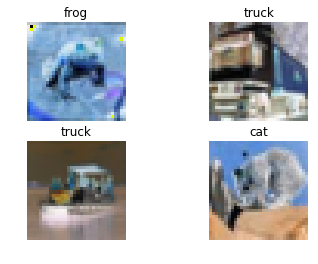

In [2]:
# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

# Show dimension for each variable
print ('Train image shape:    {0}'.format(xTrain.shape))
print ('Train label shape:    {0}'.format(yTrain.shape))
print ('Validate image shape: {0}'.format(xVal.shape))
print ('Validate label shape: {0}'.format(yVal.shape))
print ('Test image shape:     {0}'.format(xTest.shape))
print ('Test label shape:     {0}'.format(yTest.shape))

# Show some CIFAR10 images
plt.subplot(221)
plt.imshow(xTrain[0])
plt.axis('off')
plt.title(classesName[yTrain[0]])
plt.subplot(222)
plt.imshow(xTrain[1])
plt.axis('off')
plt.title(classesName[yTrain[1]])
plt.subplot(223)
plt.imshow(xVal[0])
plt.axis('off')
plt.title(classesName[yVal[1]])
plt.subplot(224)
plt.imshow(xTest[0])
plt.axis('off')
plt.title(classesName[yTest[0]])
plt.savefig(baseDir+'svm0.png')
# plt.clf()
plt.show()
# print(xTrain[0])

## Reshaping Data into a Vector and Normalizing it (-1 to 1)

In [3]:
print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])


(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[  59.   62.   63. ...,  123.   92.   72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ..., -0.03529412 -0.27843137
 -0.43529412]


In [4]:
#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ..., 6 6 4]
(3000, 3072)
(3000,)


## SVM Linear Kernel

In [8]:
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test)) 
    
    

Train Accuracy = 0.354667
Test Accuracy = 0.098000
Train Accuracy = 0.484667
Test Accuracy = 0.188000
Train Accuracy = 0.709333
Test Accuracy = 0.253000
Train Accuracy = 0.989667
Test Accuracy = 0.286000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000


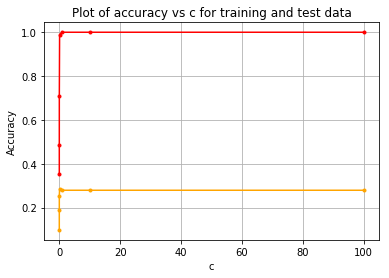

In [13]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

## SVM Polynomial Kernel

In [9]:
acc_train_svm_poly = []
acc_test_svm_poly = []

def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    
    svc_polynomial.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(xTrain)
    acc_train = np.mean(Yhat_svc_polynomial_train == yTrain)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(xVal)
    acc_test = np.mean(Yhat_svc_polynomial_test == yVal)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))

Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.139333
Accuracy = 0.087000
Accuracy = 0.335667
Accuracy = 0.151000
Accuracy = 0.804000
Accuracy = 0.267000


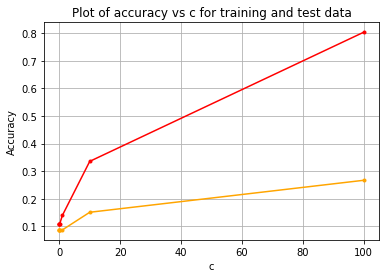

In [19]:
c_svm_poly = [0.0001,0.001,0.01,0.1,1,10,100]


for c in c_svm_poly:
    svm_polynomial(c)

plt.plot(c_svm_poly, acc_train_svm_poly,'.-',color='red')
plt.plot(c_svm_poly, acc_test_svm_poly,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [10]:
#Try more values of c for polynomial kernel.
c_svm_poly_extended=[200,500,1000]
for c in c_svm_poly_extended:
    svm_polynomial(c)

Accuracy = 0.890667
Accuracy = 0.263000
Accuracy = 0.953333
Accuracy = 0.263000
Accuracy = 0.977667
Accuracy = 0.259000


## SVM RBF Kernel

In [20]:
def svm_rbf(c, g):
    svc_rbf = svm.SVC(probability = False, kernel = 'rbf', C = c, gamma = g)
    
    # Fit the classifier on the training set.
    svc_rbf.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_rbf_train = svc_rbf.predict(xTrain)
    acc = np.mean(Yhat_svc_rbf_train == yTrain)
    print('Train Accuracy = {0:f}'.format(acc))
    acc_train_svm_rbf.append(acc)
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_rbf_test = svc_rbf.predict(xVal)
    acc = np.mean(Yhat_svc_rbf_test == yVal)
    print('Test Accuracy = {0:f}'.format(acc))
    acc_test_svm_rbf.append(acc)

Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.107333
Test Accuracy = 0.079000
Train Accuracy = 0.307333
Test Accuracy = 0.119000
Train Accuracy = 0.487333
Test Accuracy = 0.119000
Train Accuracy = 0.848333
Test Accuracy = 0.105000
Train Accuracy = 1.000000
Test Accuracy = 0.119000


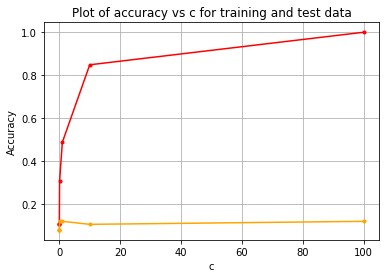

In [21]:
acc_train_svm_rbf= []
acc_test_svm_rbf = []
c_svm_rbf = [0.0001,0.001,0.01,0.1,1,10,100]

for c in c_svm_rbf:
     svm_rbf(c, 'auto')
    
plt.plot(c_svm_rbf, acc_train_svm_rbf,'.-',color='red')
plt.plot(c_svm_rbf, acc_test_svm_rbf,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()
    

## SUMMARIZING RESULTS FOR THE 3 KERNELS

In [28]:
# for i in range(len(acc_train_svm_linear)): 
#     acc_train_svm_linear[i]=round(acc_train_svm_linear[i],3)
#     acc_test_svm_linear[i]=round(acc_test_svm_linear[i],3)
#     acc_train_svm_poly[i]=round(acc_train_svm_poly[i],3)
#     acc_test_svm_poly[i]=round(acc_test_svm_poly[i],3)
#     acc_train_svm_rbf[i]=round(acc_train_svm_rbf[i],3)
#     acc_test_svm_rbf[i]=round(acc_test_svm_rbf[i],3)
    

    
print("SVM Linear Training Accuracy = ", acc_train_svm_linear)
print("SVM Linear Test Accuracy = ", acc_test_svm_linear)
print("SVM Polynomial Training Accuracy = ", acc_train_svm_poly)
print("SVM Polynomial Test Accuracy = ", acc_test_svm_poly)
print("SVM RBF Training Accuracy = ", acc_train_svm_rbf)
print("SVM RBF Test Accuracy = ", acc_test_svm_rbf)

SVM Linear Training Accuracy =  [0.35499999999999998, 0.48499999999999999, 0.70899999999999996, 0.98999999999999999, 1.0, 1.0, 1.0]
SVM Linear Test Accuracy =  [0.098000000000000004, 0.188, 0.253, 0.28599999999999998, 0.27900000000000003, 0.27900000000000003, 0.27900000000000003]
SVM Polynomial Training Accuracy =  [0.107, 0.107, 0.107, 0.107, 0.13900000000000001, 0.33600000000000002, 0.80400000000000005]
SVM Polynomial Test Accuracy =  [0.086999999999999994, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994, 0.086999999999999994, 0.151, 0.26700000000000002]
SVM RBF Training Accuracy =  [0.107, 0.107, 0.107, 0.307, 0.48699999999999999, 0.84799999999999998, 1.0]
SVM RBF Test Accuracy =  [0.079000000000000001, 0.079000000000000001, 0.079000000000000001, 0.11899999999999999, 0.11899999999999999, 0.105, 0.11899999999999999]


## BEST MODEL (LINEAR KERNEL WITH C=0.1)

In [4]:
#Train with 10000 examples with linear kernel (c=0.1)

# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

Using TensorFlow backend.


(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[  59.   62.   63. ...,  123.   92.   72.]
(49000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ..., -0.03529412 -0.27843137
 -0.43529412]


In [9]:
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

from sklearn import svm
svc = svm.SVC(probability = False, kernel = 'linear', C = 0.1)
svc.fit(xTrain, yTrain)

[6 9 9 ..., 1 1 5]
(10000, 3072)
(10000,)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test)) 

Test Accuracy = 0.293000


In [9]:
def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors=3
    xsq = x.reshape((nrow,ncol,ncolors))
    plt.imshow(xsq)
#     plt.xticks([])
#     plt.yticks([])

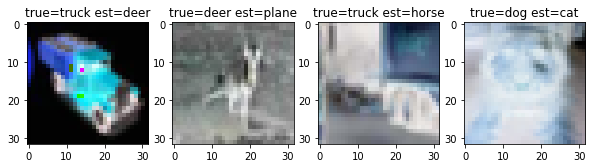

In [10]:
#Plotting some of the errors
Ierr = np.where((Yhat_svc_linear_test != yVal))[0]
nplt = 4
plt.figure(figsize=(10, 4))
for i in range(nplt):        
    plt.subplot(1,nplt,i+1)        
    ind = Ierr[i]    
    plt_img(xVal[ind,:])        
    title = 'true={0:s} est={1:s}'.format(classesName[yVal[ind].astype(int)], classesName[Yhat_svc_linear_test[ind].astype(int)])
    plt.title(title)

## Without Normalization (using original pixel values 0-255) 

In [2]:
import os
import time
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

# #Normalize 
# xTrain=((xTrain/255)*2)-1 
# print(xTrain.shape)
# print(xTrain[0])

#Running SVM 
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(xTrain, yTrain)

Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test)) 


(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[  59.   62.   63. ...,  123.   92.   72.]
[6 9 9 ..., 1 1 5]
(10000, 3072)
(10000,)
Test Accuracy = 0.306000


## With Mean Normalization 

In [4]:
import os
import time
import numpy as np


import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline


# Load the CIFAR10 dataset
from keras.datasets import cifar10
baseDir = os.path.dirname(os.path.abspath('__file__')) + '/'
classesName = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)


meanImage = np.mean(xTrain, axis=0)
print(meanImage.shape)
print('---------------------')
xTrain -= meanImage
xVal -= meanImage
xTest -= meanImage



print(xTrain.shape)
print(yTrain.shape)
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])



#Running SVM 
xTrain=xTrain[:10000,:]
yTrain=yTrain[:10000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)
from sklearn import svm
svc = svm.SVC(probability=False,  kernel="linear", C=0.1)
svc.fit(xTrain, yTrain)

Yhat_svc_linear_test = svc.predict(xVal)
acc_test = np.mean(Yhat_svc_linear_test == yVal)
print('Test Accuracy = {0:f}'.format(acc_test)) 




(32, 32, 3)
---------------------
(49000, 32, 32, 3)
(49000,)
(49000, 3072)
[-71.64189796 -73.98173469 -69.47391837 ...,  -3.64218367 -33.86195918
 -42.39957143]
[6 9 9 ..., 1 1 5]
(10000, 3072)
(10000,)
Test Accuracy = 0.306000
